In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
import tensorflow as tf
print(tf.__version__)
print(np.__version__)
import io

2.6.0
1.19.5


In [2]:
# Use the below code to mount your google drive

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
pwd

'/content'

In [5]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


In [6]:
%cd Kaggle

/content/gdrive/My Drive/Kaggle


In [7]:
from google.colab import files
uploaded = files.upload()

Saving submit.csv to submit (1).csv
Saving test.csv to test (1).csv
Saving train.csv to train (1).csv


In [8]:
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
test = pd.read_csv(io.BytesIO(uploaded['test.csv']))
print("Dataset has been Loaded successfully")

Dataset has been Loaded successfully


In [9]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [10]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [11]:
df.shape

(20800, 5)

In [12]:
print("\033[1m" + "Number of row in the dataset are:"  + "\033[0m" , df.shape[0])
print("\033[1m" + "Number of columns in the dataset are:" + "\033[0m", df.shape[1])

Number of row in the dataset are: 20800
Number of columns in the dataset are: 5


In [13]:
print("\033[1m" + "Number of row in the dataset are:"  + "\033[0m" , test.shape[0])
print("\033[1m" + "Number of columns in the dataset are:" + "\033[0m", test.shape[1])

Number of row in the dataset are: 5200
Number of columns in the dataset are: 4


In [14]:
df.tail()

,id,title,author,text,label
20795,20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...,0
20796,20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...,0
20797,20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...,0
20798,20798,"NATO, Russia To Hold Parallel Exercises In Bal...",Alex Ansary,"NATO, Russia To Hold Parallel Exercises In Bal...",1
20799,20799,What Keeps the F-35 Alive,David Swanson,"David Swanson is an author, activist, journa...",1


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5078 non-null   object
 2   author  4697 non-null   object
 3   text    5193 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [17]:
df.describe(include = 'object').T

,count,unique,top,freq
title,20242,19803,Get Ready For Civil Unrest: Survey Finds That ...,5
author,18843,4201,Pam Key,243
text,20761,20386,,75


In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20800.0,10399.500000,6004.587135,0.0,5199.75,10399.5,15599.25,20799.0
label,20800.0,0.500625,0.500012,0.0,0.00,1.0,1.00,1.0


In [19]:
df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [20]:
df.isnull().sum().sum()

2554

In [21]:
test.isnull().sum().sum()

632

In [22]:
test.isnull().sum()

id          0
title     122
author    503
text        7
dtype: int64

In [23]:
df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [24]:
df['id'].nunique() / df.shape[0]

1.0

In [25]:
test['id'].nunique() / test.shape[0]

1.0

In [26]:
df['id'].min(), df['id'].max()

(0, 20799)

In [27]:
test['id'].min(), test['id'].max()

(20800, 25999)

In [28]:
df_copy = df.copy()
test_copy = test.copy()

In [29]:
df_copy.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [30]:
df_copy = df_copy.set_index('id')
df_copy.head()

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [31]:
test_copy.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [32]:
test_copy.set_index('id', inplace = True)
test_copy.head()

,title,author,text
id,,,
20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [33]:
print("\033[1m" + "Number of row in the dataset are:"  + "\033[0m" , df_copy.shape[0])
print("\033[1m" + "Number of columns in the dataset are:" + "\033[0m", df_copy.shape[1])

Number of row in the dataset are: 20800
Number of columns in the dataset are: 4


In [34]:
print("\033[1m" + "Number of row in the dataset are:"  + "\033[0m" , test_copy.shape[0])
print("\033[1m" + "Number of columns in the dataset are:" + "\033[0m", test_copy.shape[1])

Number of row in the dataset are: 5200
Number of columns in the dataset are: 3


In [35]:
#filling NULL values with empty string
df_copy = df_copy.fillna('')
test_copy = test_copy.fillna('')

In [36]:
df_copy.isnull().sum()

title     0
author    0
text      0
label     0
dtype: int64

In [37]:
test_copy.isnull().sum()

title     0
author    0
text      0
dtype: int64

In [38]:
X = df_copy.drop('label',axis=1)
X

,title,author,text
id,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...
...,...,...,...
20795,Rapper T.I.: Trump a ’Poster Child For White S...,Jerome Hudson,Rapper T. I. unloaded on black celebrities who...
20796,"N.F.L. Playoffs: Schedule, Matchups and Odds -...",Benjamin Hoffman,When the Green Bay Packers lost to the Washing...
20797,Macy’s Is Said to Receive Takeover Approach by...,Michael J. de la Merced and Rachel Abrams,The Macy’s of today grew from the union of sev...


In [39]:
## Get the Dependent features
Y = df_copy['label']

In [40]:
Y

id
0        1
1        0
2        1
3        1
4        1
        ..
20795    0
20796    0
20797    0
20798    1
20799    1
Name: label, Length: 20800, dtype: int64

In [41]:
Y.value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [42]:
print(X.shape)
print(Y.shape)

(20800, 3)
(20800,)


In [43]:
# Import Bag of Words
from sklearn.feature_extraction.text import CountVectorizer

In [44]:
df_copy.head(10)

,title,author,text,label
id,,,,
0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
6,Life: Life Of Luxury: Elton John’s 6 Favorite ...,,Ever wonder how Britain’s most iconic pop pian...,1
7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
8,Excerpts From a Draft Script for Donald Trump’...,,Donald J. Trump is scheduled to make a highly ...,0


In [45]:
df_copy['text'][102]

'Donald J. Trump entered the homestretch of the campaign at a pronounced financial disadvantage to Hillary Clinton, according to figures Mr. Trump’s team released on Saturday, and far below the   goal he set for himself earlier in the race. After raising $100 million in partnership with Republican Party organizations in September, Mr. Trump and committees linked to his campaign began October with $75 million in cash on hand. Mrs. Clinton raised $154 million in September and began October with roughly $150 million in the bank, her campaign said, twice as much as Mr. Trump. Many of the Republican Party’s leading contributors have stayed away from his campaign, judging from financial disclosures filed by Mr. Trump and his party on Saturday, signaling his difficulties in persuading party elites to back him. One exception was Peter Thiel, the billionaire Silicon Valley investor who spoke in support of Mr. Trump at the Republican convention in July. A person close to Mr. Thiel said on Saturd

In [46]:
df_copy['text'][6]

'Ever wonder how Britain’s most iconic pop pianist gets through a long flight? Here are the six pictures of sharks Sir Elton John likes to stare at to pass the time on an airplane. 1. A Shark Swimming \nSit next to Elton John on a flight and you’ll see a man living in the lap of luxury, as he immediately tapes this photo of a shark darting through the ocean over his window to stare at throughout the trip. The platinum-selling artist has been known to pull his window shade down to make the shark disappear, and then quickly retract it to mark the animal’s triumphant return. He will often repeat this act dozens of times per flight. 2. A Great White Shark Leaping Into The Air \nWhen you’re an international pop sensation worth an estimated $450 million, people go the extra mile to make you happy. Flight crews are instructed to place this photo of a breaching great white in Elton John’s seat-back pocket before he even boards the plane. The five-time Grammy winner loves to pull the image out 

In [47]:
df_copy['title'][102]

'Hillary Clinton Builds $150 Million War Chest, Doubling Donald Trump - The New York Times'

In [48]:
import nltk
import re
# PorterStemmer responsible to perform Stemming
from nltk.stem import PorterStemmer

from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

#### Stopwords 
 - In computing, stop words are words that are filtered out before or after the natural language data (text) are processed. While “stop words” typically refers to the most common words in a language, all-natural language processing tools don’t use a single universal list of stop words.
 - “stop words” usually refers to the most common words in a language. There is no universal list of “stop words” that is used by all NLP tools in common.
 - Basically every language like english, french, german, etc may has some pre-defined stop words which is not so important.
 - Consider the sentence "Yet we have not done this to any other nation" in this stop words would include any, to , we which are repeated mostly in the entire dataset and does not make any usefullness in the data and hence even if we remove it, it won't be impacting that much to our model.
 - Stopwords are the words in any language which does not add much meaning to a sentence. They can safely be ignored without sacrificing the meaning of the sentence. For some search engines, these are some of the most common, short function words, such as the, is, at, which, and on. In this case, stop words can cause problems when searching for phrases that include them, particularly in names such as “The Who” or “Take That”.
 
**When to remove stop words?**
 - If we have a task of text classification or sentiment analysis then we should remove stop words as they do not provide any information to our model, i.e keeping out unwanted words out of our corpus(A corpus is a large and structured set of machine-readable texts that have been produced in a natural communicative setting. BASICALLY consider Paragraph variable that can be considered as a Corpus), but if we have the task of language translation then stopwords are useful, as they have to be translated along with other words.
 - There is no hard and fast rule on when to remove stop words. But I would suggest removing stop words if our task to be performed is one of Language Classification, Spam Filtering, Caption Generation, Auto-Tag Generation, Sentiment analysis, or something that is related to text classification.
 - On the other hand, if our task is one of Machine Translation, Question-Answering problems, Text Summarization, Language Modeling, it’s better not to remove the stop words as they are a crucial part of these applications.

In [49]:
# List of stopwords in english language
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
# List of stopwords in German language
stopwords.words('german')

['aber',
 'alle',
 'allem',
 'allen',
 'aller',
 'alles',
 'als',
 'also',
 'am',
 'an',
 'ander',
 'andere',
 'anderem',
 'anderen',
 'anderer',
 'anderes',
 'anderm',
 'andern',
 'anderr',
 'anders',
 'auch',
 'auf',
 'aus',
 'bei',
 'bin',
 'bis',
 'bist',
 'da',
 'damit',
 'dann',
 'der',
 'den',
 'des',
 'dem',
 'die',
 'das',
 'dass',
 'daß',
 'derselbe',
 'derselben',
 'denselben',
 'desselben',
 'demselben',
 'dieselbe',
 'dieselben',
 'dasselbe',
 'dazu',
 'dein',
 'deine',
 'deinem',
 'deinen',
 'deiner',
 'deines',
 'denn',
 'derer',
 'dessen',
 'dich',
 'dir',
 'du',
 'dies',
 'diese',
 'diesem',
 'diesen',
 'dieser',
 'dieses',
 'doch',
 'dort',
 'durch',
 'ein',
 'eine',
 'einem',
 'einen',
 'einer',
 'eines',
 'einig',
 'einige',
 'einigem',
 'einigen',
 'einiger',
 'einiges',
 'einmal',
 'er',
 'ihn',
 'ihm',
 'es',
 'etwas',
 'euer',
 'eure',
 'eurem',
 'euren',
 'eurer',
 'eures',
 'für',
 'gegen',
 'gewesen',
 'hab',
 'habe',
 'haben',
 'hat',
 'hatte',
 'hatten',
 '

In [51]:
# intializing Stemming
stemming = PorterStemmer()

corpus = []

# Running for loop from 0-20800
for i in range(0, len(df_copy)):
    
    # Will contain only text i.e. a-z or A-Z rest all are removed i.e. Numerical value
    review = re.sub('[^a-zA-Z]', ' ', df_copy['title'][i])
    # Python being case sensitive lowering every word
    review = review.lower()
    review = review.split()
    
    # PErform stemming 
    # This line will remove words from stopwords and then apply stemming on the remaining words.
    # for word in words means looping through each and every words and store it in word variable
    # set(stopwords.words('english')) set only store unique value and hence we will remove duplicate values.
    # if word not in set(stopwords.words('english')) means if the word is not available inside stopword then apply stemming
    # stemming.stem(word) means that apply stemming on word i.e. stemming.stem() is used to perform stemming
    review = [stemming.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [52]:
df_copy['title'][1021]

"Farm owner arrested for protesting Dakota Access Pipeline's theft of her land"

In [53]:
corpus[1021]

'farm owner arrest protest dakota access pipelin theft land'

Check the difference between the above 2 code. The one on the above(upar ke upar) is from original dataset and the one above is after performing Stemming, Lowering everything. removing stopwords and Regular expression

In [54]:
df_copy['title'][10211]

'Sleeping With a Weighted Blanket Could Help Insomnia and Anxiety | Underground Health'

In [55]:
corpus[10211]

'sleep weight blanket could help insomnia anxieti underground health'

In [56]:
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [57]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [58]:
X.shape

(20800, 5000)

In [59]:
corpus[10211], X[10211][:738]

('sleep weight blanket could help insomnia anxieti underground health',
 array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.42, random_state=0)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((12064, 5000), (8736, 5000), (12064,), (8736,))

In [62]:
cv.get_feature_names()[:20]
# Getting the Feature name and since we have define nggram as 1-3 we only get upto 3 words as seen in last line

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [63]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [64]:
pd.set_option("Display.max_columns", None)

In [65]:
count_df = pd.DataFrame(X_train, columns=cv.get_feature_names())
count_df.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0        0    0         0       0    0       0    0      0       0        0   
1        0    0         0       0    0       0    0      0       0        0   
2        0    0         0       0    0       0    0      0       0        0   
3        0    0         0       0    0       0    0      0       0        0   
4        0    0         0       0    0       0    0      0       0        0   

   absurd  abus  abus new  abus new york  academi  accept  access  \
0       0     0         0              0        0       0       0   
1       0     0         0              0        0       0       0   
2       0     0         0              0        0       0       0   
3       0     0         0              0        0       0       0   
4       0     0         0              0        0       0       0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0               0                       0      0         0       0        0   
1               0                       0      0         0       0        0   
2               0                       0      0         0       0        0   
3               0                       0      0         0       0        0   
4               0                       0      0         0       0        0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0      0            0       0           0               0   
1      0            0       0           0               0   
2      0            0       0           0               0   
3      0            0       0           0               0   
4      0            0       0           0               0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                     0     0       0        0    0       0    0         0   
1                     0     0       0        0    0       0    0         0   
2                     0     0       0        0    0       0    0         0   
3                     0     0       0        0    0       0    0         0   
4                     0     0       0        0    0       0    0         0   

   act new  act new york  action  activ  activist  actor  actual  ad  adam  \
0        0             0       0      0         0      0       0   0     0   
1        0             0       0      0         0      0       0   0     0   
2        0             0       0      0         0      0       0   0     0   
3        0             0       0      0         0      0       0   0     0   
4        0             0       0      0         0      0       0   0     0   

   add  addict  address  adhd  admin  administr  admir  admit  adopt  adult  \
0    0       0        0     0      0          0      0      0      0      0   
1    0       0        0     0      0          0      0      0      0      0   
2    0       0        0     0      0          0      0      0      0      0   
3    0       0        0     0      0          0      0      0      0      0   
4    0       0        0     0      0          0      0      0      0      0   

   advanc  advertis  advic  advis  advis new  advis new york  advisor  advoc  \
0       0         0      0      0          0               0        0      0   
1       0         0      0      0          0               0        0      0   
2       0         0      0      0          0               0        0      0   
3       0         0      0      0          0               0        0      0   
4       0         0      0      0          0               0        0      0   

   affair  affect  affili  affirm  afford  afghan  afghanistan  africa  \
0       0       0       0       0       0       0            0       0   
1       0       0       0       0       0       0            0       0   
2       0       0       0       0       0       0            0       0   
3       0       0       0       0       0       0            0       0   
4      

In [66]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### MultinomialNB Algorithm

In [67]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

from sklearn import metrics
import numpy as np
import itertools

accuracy:   0.870
Confusion matrix, without normalization


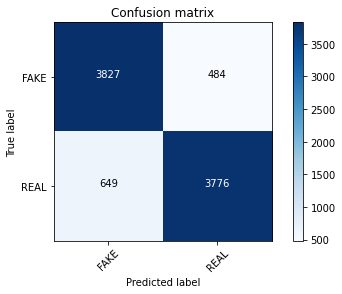

In [68]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE', 'REAL'])

### Passive Aggressive Classifier Algorithm`

In [69]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(n_iter_no_change=50)

accuracy:   0.920
Confusion matrix, without normalization


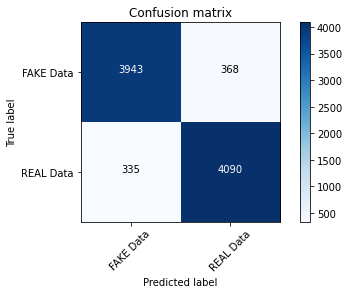

In [70]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

### Multinomial Classifier with Hyperparameter

In [71]:
classifier=MultinomialNB(alpha=0.1)

previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.85382326007326
Alpha: 0.1, Score : 0.8695054945054945
Alpha: 0.2, Score : 0.8692765567765568
Alpha: 0.30000000000000004, Score : 0.8693910256410257
Alpha: 0.4, Score : 0.8700778388278388
Alpha: 0.5, Score : 0.8706501831501832
Alpha: 0.6000000000000001, Score : 0.86996336996337
Alpha: 0.7000000000000001, Score : 0.86996336996337
Alpha: 0.8, Score : 0.86996336996337
Alpha: 0.9, Score : 0.8705357142857143


In [72]:
## Get Features names
feature_names = cv.get_feature_names()

In [73]:
classifier.coef_[0]

array([ -8.57630974,  -9.40138446, -10.12050713, ...,  -9.69765028,
        -8.8308396 ,  -9.17312581])

In [74]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.048311850218788, 'trump'),
 (-4.347427733884611, 'hillari'),
 (-4.402960170216599, 'clinton'),
 (-4.907575665347603, 'elect'),
 (-5.221489702158262, 'new'),
 (-5.282138843694683, 'us'),
 (-5.333454077288693, 'video'),
 (-5.410976926055603, 'hillari clinton'),
 (-5.430125428788834, 'war'),
 (-5.434970399506588, 'russia'),
 (-5.444731335959922, 'news'),
 (-5.449647766708563, 'fbi'),
 (-5.474599160931811, 'comment'),
 (-5.515863395722092, 'america'),
 (-5.547968881930056, 'email'),
 (-5.700399092278736, 'vote'),
 (-5.700399092278736, 'obama'),
 (-5.719581266117509, 'world'),
 (-5.759086073850368, 'american'),
 (-5.7726089303605, 'donald')]

## TF-IDF Vectorizer

In [75]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X_tfidf = tfidf.fit_transform(corpus).toarray()

In [76]:
X_tfidf.shape

(20800, 5000)

In [77]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, Y, test_size=0.42, random_state=0)

In [78]:
X_train_tfidf.shape, X_test_tfidf.shape, y_train_tfidf.shape, y_test_tfidf.shape

((12064, 5000), (8736, 5000), (12064,), (8736,))

In [79]:
tfidf.get_feature_names()[:20]

['abandon',
 'abc',
 'abc news',
 'abduct',
 'abe',
 'abedin',
 'abl',
 'abort',
 'abroad',
 'absolut',
 'absurd',
 'abus',
 'abus new',
 'abus new york',
 'academi',
 'accept',
 'access',
 'access pipelin',
 'access pipelin protest',
 'accid']

In [80]:
tfidf.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [81]:
count_tfidf = pd.DataFrame(X_train_tfidf, columns=tfidf.get_feature_names())
count_tfidf.head()

abandon  abc  abc news  abduct  abe  abedin  abl  abort  abroad  absolut  \
0      0.0  0.0       0.0     0.0  0.0     0.0  0.0    0.0     0.0      0.0   
1      0.0  0.0       0.0     0.0  0.0     0.0  0.0    0.0     0.0      0.0   
2      0.0  0.0       0.0     0.0  0.0     0.0  0.0    0.0     0.0      0.0   
3      0.0  0.0       0.0     0.0  0.0     0.0  0.0    0.0     0.0      0.0   
4      0.0  0.0       0.0     0.0  0.0     0.0  0.0    0.0     0.0      0.0   

   absurd  abus  abus new  abus new york  academi  accept  access  \
0     0.0   0.0       0.0            0.0      0.0     0.0     0.0   
1     0.0   0.0       0.0            0.0      0.0     0.0     0.0   
2     0.0   0.0       0.0            0.0      0.0     0.0     0.0   
3     0.0   0.0       0.0            0.0      0.0     0.0     0.0   
4     0.0   0.0       0.0            0.0      0.0     0.0     0.0   

   access pipelin  access pipelin protest  accid  accident  accord  account  \
0             0.0                     0.0    0.0       0.0     0.0      0.0   
1             0.0                     0.0    0.0       0.0     0.0      0.0   
2             0.0                     0.0    0.0       0.0     0.0      0.0   
3             0.0                     0.0    0.0       0.0     0.0      0.0   
4             0.0                     0.0    0.0       0.0     0.0      0.0   

   accus  accus trump  achiev  acknowledg  acknowledg emf  \
0    0.0          0.0     0.0         0.0             0.0   
1    0.0          0.0     0.0         0.0             0.0   
2    0.0          0.0     0.0         0.0             0.0   
3    0.0          0.0     0.0         0.0             0.0   
4    0.0          0.0     0.0         0.0             0.0   

   acknowledg emf damag  aclu  acquit  acquitt  acr  across  act  act like  \
0                   0.0   0.0     0.0      0.0  0.0     0.0  0.0       0.0   
1                   0.0   0.0     0.0      0.0  0.0     0.0  0.0       0.0   
2                   0.0   0.0     0.0      0.0  0.0     0.0  0.0       0.0   
3                   0.0   0.0     0.0      0.0  0.0     0.0  0.0       0.0   
4                   0.0   0.0     0.0      0.0  0.0     0.0  0.0       0.0   

   act new  act new york  action  activ  activist  actor  actual   ad  adam  \
0      0.0           0.0     0.0    0.0       0.0    0.0     0.0  0.0   0.0   
1      0.0           0.0     0.0    0.0       0.0    0.0     0.0  0.0   0.0   
2      0.0           0.0     0.0    0.0       0.0    0.0     0.0  0.0   0.0   
3      0.0           0.0     0.0    0.0       0.0    0.0     0.0  0.0   0.0   
4      0.0           0.0     0.0    0.0       0.0    0.0     0.0  0.0   0.0   

   add  addict  address  adhd  admin  administr  admir  admit  adopt  adult  \
0  0.0     0.0      0.0   0.0    0.0        0.0    0.0    0.0    0.0    0.0   
1  0.0     0.0      0.0   0.0    0.0        0.0    0.0    0.0    0.0    0.0   
2  0.0     0.0      0.0   0.0    0.0        0.0    0.0    0.0    0.0    0.0   
3  0.0     0.0      0.0   0.0    0.0        0.0    0.0    0.0    0.0    0.0   
4  0.0     0.0      0.0   0.0    0.0        0.0    0.0    0.0    0.0    0.0   

   advanc  advertis  advic  advis  advis new  advis new york  advisor  advoc  \
0     0.0       0.0    0.0    0.0        0.0             0.0      0.0    0.0   
1     0.0       0.0    0.0    0.0        0.0             0.0      0.0    0.0   
2     0.0       0.0    0.0    0.0        0.0             0.0      0.0    0.0   
3     0.0       0.0    0.0    0.0        0.0             0.0      0.0    0.0   
4     0.0       0.0    0.0    0.0        0.0             0.0      0.0    0.0   

   affair  affect  affili  affirm  afford  afghan  afghanistan  africa  \
0     0.0     0.0     0.0     0.0     0.0     0.0          0.0     0.0   
1     0.0     0.0     0.0     0.0     0.0     0.0          0.0     0.0   
2     0.0     0.0     0.0     0.0     0.0     0.0          0.0     0.0   
3     0.0     0.0     0.0     0.0     0.0     0.0          0.0     0.0   
4

In [82]:
count_tfidf['york time'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.114069
4    0.106904
Name: york time, dtype: float64

### MultinomialNB Algorithm using TFIDF

accuracy:   0.858
Confusion matrix, without normalization


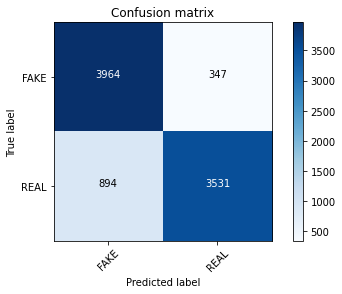

In [83]:
classifier.fit(X_train_tfidf, y_train_tfidf)
pred_tfidf = classifier.predict(X_test_tfidf)
score_tfidf = metrics.accuracy_score(y_test_tfidf, pred_tfidf)
print("accuracy:   %0.3f" % score_tfidf)
cm_tfidf = metrics.confusion_matrix(y_test_tfidf, pred_tfidf)
plot_confusion_matrix(cm_tfidf, classes=['FAKE', 'REAL'])

### Multinomial Classifier with Hyperparameter using TF-IDF

In [84]:
classifier=MultinomialNB(alpha=0.1)

In [85]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train_tfidf,y_train_tfidf)
    y_pred_tfidf=sub_classifier.predict(X_test_tfidf)
    score_tfidf = metrics.accuracy_score(y_test_tfidf, y_pred_tfidf)
    if score_tfidf>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score_tfidf))

/usr/local/lib/python3.7/dist-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.8356227106227107
Alpha: 0.1, Score : 0.8519917582417582
Alpha: 0.2, Score : 0.8541666666666666
Alpha: 0.30000000000000004, Score : 0.8564560439560439
Alpha: 0.4, Score : 0.8561126373626373
Alpha: 0.5, Score : 0.8561126373626373
Alpha: 0.6000000000000001, Score : 0.8571428571428571
Alpha: 0.7000000000000001, Score : 0.857257326007326
Alpha: 0.8, Score : 0.8574862637362637
Alpha: 0.9, Score : 0.8579441391941391


### Passive Aggressive Classifier Algorithm using TF-IDF

accuracy:   0.858
Confusion matrix, without normalization


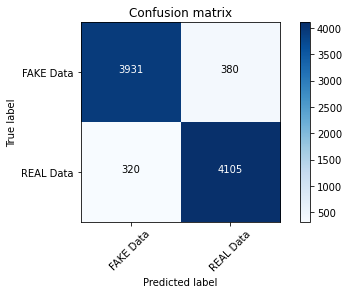

In [86]:
linear_clf.fit(X_train_tfidf, y_train_tfidf)
pred_tfidf_1 = linear_clf.predict(X_test_tfidf)
score_tfidf_1 = metrics.accuracy_score(y_test_tfidf, pred_tfidf_1)
print("accuracy:   %0.3f" % score_tfidf)
cm_tfidf_1 = metrics.confusion_matrix(y_test_tfidf, pred_tfidf_1)
plot_confusion_matrix(cm_tfidf_1, classes=['FAKE Data', 'REAL Data'])

In [87]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:100]

[(-9.955218246768197, 'abe'),
 (-9.955218246768197, 'abroad'),
 (-9.955218246768197, 'abus new'),
 (-9.955218246768197, 'abus new york'),
 (-9.955218246768197, 'act new'),
 (-9.955218246768197, 'act new york'),
 (-9.955218246768197, 'advic'),
 (-9.955218246768197, 'advis new'),
 (-9.955218246768197, 'advis new york'),
 (-9.955218246768197, 'age new'),
 (-9.955218246768197, 'age new york'),
 (-9.955218246768197, 'agenda breitbart'),
 (-9.955218246768197, 'ahead trump'),
 (-9.955218246768197, 'aleppo new'),
 (-9.955218246768197, 'aleppo new york'),
 (-9.955218246768197, 'alex jone'),
 (-9.955218246768197, 'ali'),
 (-9.955218246768197, 'alter'),
 (-9.955218246768197, 'america breitbart'),
 (-9.955218246768197, 'america new'),
 (-9.955218246768197, 'america new york'),
 (-9.955218246768197, 'ami schumer'),
 (-9.955218246768197, 'amp'),
 (-9.955218246768197, 'anderson'),
 (-9.955218246768197, 'anderson cooper'),
 (-9.955218246768197, 'annual'),
 (-9.955218246768197, 'anti abort'),
 (-9.9552

In [88]:
corpus[:100]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'life life luxuri elton john favorit shark pictur stare long transcontinent flight',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'excerpt draft script donald trump q ampa black church pastor new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag',
 'russian research discov secret nazi militari base treasur hunter arctic photo',
 'us offici see link trump russia',
 'ye paid govern troll social media blog forum websit',
 'major leagu soccer argentin find hom

In [89]:
test_copy.dtypes

title     object
author    object
text      object
dtype: object

In [90]:
test_copy = test.copy()
test_copy = test_copy.fillna("")
test_copy.isnull().sum()

id        0
title     0
author    0
text      0
dtype: int64

In [91]:
# intializing Stemming
stemming = PorterStemmer()

corpus_test = []

for i in range(0, len(test_copy)):
    
    review = re.sub('[^a-zA-Z]', ' ', test_copy['title'][i])
    review = review.lower()
    review = review.split()
    review = [stemming.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus_test.append(review)

In [92]:
corpus_test[324]

'heaven cleveland new york time'

In [93]:
voc_size = 5000

In [94]:
# Converting to one hot representation
from tensorflow.keras.preprocessing.text import one_hot

onehot_rep = [one_hot(words,voc_size)for words in corpus]
onehot_rep_test = [one_hot(words,voc_size)for words in corpus_test]

In [95]:
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential

In [96]:
#Padding Sentences to make them of same size
embedded_docs = pad_sequences(onehot_rep, padding='pre', maxlen=25)
embedded_docs_test = pad_sequences(onehot_rep_test, padding='pre', maxlen=25)

In [97]:
embedded_docs[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0, 3913, 2334, 3080, 4488, 4792, 2480, 1677,
       1477, 4530, 3141], dtype=int32)

In [98]:
embedded_docs_test[10]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0, 2988, 3445, 1934,  796,
       4530, 2285, 1341], dtype=int32)

In [99]:
#We have used embedding layers with LSTM
model = Sequential()
model.add(Embedding(voc_size,40,input_length=25))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 25, 40)            200000    
_________________________________________________________________
dropout (Dropout)            (None, 25, 40)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 100)               56400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                6464      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 6

In [100]:
#Converting into numpy array
X_final = np.array(embedded_docs)
y_final = np.array(Y)
test_final = np.array(embedded_docs_test)
X_final.shape,y_final.shape,test_final.shape

((20800, 25), (20800,), (5200, 25))

In [101]:
#training model
model.fit(X_final,y_final,epochs=20,batch_size=64)

Epoch 1/20
325/325 [==============================] - 9s 5ms/step - loss: 0.2590 - accuracy: 0.8963
Epoch 2/20
325/325 [==============================] - 2s 5ms/step - loss: 0.1422 - accuracy: 0.9457
Epoch 3/20
325/325 [==============================] - 2s 5ms/step - loss: 0.1088 - accuracy: 0.9597
Epoch 4/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0829 - accuracy: 0.9699
Epoch 5/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0635 - accuracy: 0.9774
Epoch 6/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0471 - accuracy: 0.9838
Epoch 7/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0371 - accuracy: 0.9876
Epoch 8/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0315 - accuracy: 0.9897
Epoch 9/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0235 - accuracy: 0.9922
Epoch 10/20
325/325 [==============================] - 2s 5ms/step - loss: 0.0276 - accuracy: 0.9904

In [104]:
Y_pred = model.predict(test_final)
Y_pred

array([[3.3763811e-07],
       [9.9999988e-01],
       [1.0316406e-01],
       ...,
       [6.0637234e-08],
       [1.3524960e-01],
       [2.2085498e-14]], dtype=float32)

https://www.kaggle.com/jsvishnuj/fakenews-detection-using-lstm-neural-network<br>
https://www.kaggle.com/khanrahim/fake-news-classification-easiest-99-accuracy#Conclusion